In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import sklearn
from shapely.geometry import Point

In [2]:
df = pd.read_csv('DataViz2026-CUBoulder-Buildings-v2.csv')

## Questions to Answer with Data/Associations

Building name:
- Semantic analysis of building name and building use or relation to other data?

Building Use:
- Building use vs Square footage?
- Building Use vs Zone
- Building Use vs Year Built?

Test Correlation between data


In [3]:
df

,Building Name,Building Use,Square Footage,Zone,Year Built,Year Acquired,Latitude,Longitude
0,1135 Broadway,Classroom/Admin,18408,MAIN_CAMP,1960.0,2019.0,40.008110,-105.275666
1,1221 26Th Street,Residential,2754,MAIN_CAMP,NaN,2021.0,40.008831,-105.261656
2,1301 Walnut St,Classroom/Admin,4226,OFF_CAMPUS,NaN,2018.0,40.017512,-105.277777
3,1330/1332 Grandview,Classroom/Admin,1776,GRANDVIEW,1949.0,1968.0,40.011326,-105.275274
4,1506 Broadway,Other,10977,GRANDVIEW,NaN,2021.0,40.011758,-105.277149
...,...,...,...,...,...,...,...,...
360,Wind Tunnel,Research/Lab,3609,EAST_CAMP,2015.0,NaN,40.010354,-105.241302
361,Wolf Law Building,Classroom/Admin,190007,MAIN_CAMP,2006.0,NaN,40.001168,-105.262336
362,Woodbury Arts & Sciences Building,Historic Bldg,13573,MAIN_CAMP,1890.0,NaN,40.009225,-105.272313
363,Xd Cabin,Classroom/Admin,831,GRANDVIEW,1987.0,NaN,40.011175,-105.275267


In [4]:
building_use_dict = {use: num for (num,use) in enumerate(set(df['Building Use']))}
zone_dict = {zone: num for (num,zone) in enumerate(set(df['Zone']))}

In [5]:
set(df['Zone'])

{'EASTCAMPN',
 'EAST_CAMP',
 'GRANDVIEW',
 'MAIN CAMP',
 'MAIN_CAMP',
 'MTN_RESEARCH',
 'N_BLDR_CRK',
 'OFF_CAMPUS',
 'SOUTH_CAMP',
 'WILL_VILL'}

In [6]:
df['use_num'] = df['Building Use'].map(building_use_dict)
df['zone_num'] = df['Zone'].map(zone_dict)
df

,Building Name,Building Use,Square Footage,Zone,Year Built,Year Acquired,Latitude,Longitude,use_num,zone_num
0,1135 Broadway,Classroom/Admin,18408,MAIN_CAMP,1960.0,2019.0,40.008110,-105.275666,0,9
1,1221 26Th Street,Residential,2754,MAIN_CAMP,NaN,2021.0,40.008831,-105.261656,4,9
2,1301 Walnut St,Classroom/Admin,4226,OFF_CAMPUS,NaN,2018.0,40.017512,-105.277777,0,8
3,1330/1332 Grandview,Classroom/Admin,1776,GRANDVIEW,1949.0,1968.0,40.011326,-105.275274,0,7
4,1506 Broadway,Other,10977,GRANDVIEW,NaN,2021.0,40.011758,-105.277149,5,7
...,...,...,...,...,...,...,...,...,...,...
360,Wind Tunnel,Research/Lab,3609,EAST_CAMP,2015.0,NaN,40.010354,-105.241302,6,1
361,Wolf Law Building,Classroom/Admin,190007,MAIN_CAMP,2006.0,NaN,40.001168,-105.262336,0,9
362,Woodbury Arts & Sciences Building,Historic Bldg,13573,MAIN_CAMP,1890.0,NaN,40.009225,-105.272313,1,9
363,Xd Cabin,Classroom/Admin,831,GRANDVIEW,1987.0,NaN,40.011175,-105.275267,0,7


In [7]:
df.drop('Building Name', axis=1).drop('Building Use', axis=1).drop('Zone', axis=1).corr().kurt()

Square Footage    2.411785
Year Built        0.318593
Year Acquired     0.154337
Latitude          1.599362
Longitude         1.709029
use_num           0.911609
zone_num          1.132494
dtype: float64

In [8]:
def colr(x):
    if abs(x) > 0.2 and abs(x) <= 0.5:
        return 'background-color: lightgreen'
    elif abs(x) > 0.5 and abs(x) < 1.0:
        return 'background-color: green'
    else:
        None

data = df.drop('Building Name', axis=1).drop('Building Use', axis=1).drop('Zone', axis=1).corr()
data.style.applymap(colr)

/tmp/ipykernel_129573/3697603317.py:10: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  data.style.applymap(colr)


,Square Footage,Year Built,Year Acquired,Latitude,Longitude,use_num,zone_num
Square Footage,1.000000,0.309504,0.270300,-0.298124,0.230727,0.046840,0.347256
Year Built,0.309504,1.000000,0.682818,-0.517558,0.570652,0.309554,-0.044075
Year Acquired,0.270300,0.682818,1.000000,0.072528,0.345410,0.503668,-0.278339
Latitude,-0.298124,-0.517558,0.072528,1.000000,-0.873505,0.097334,-0.415876
Longitude,0.230727,0.570652,0.345410,-0.873505,1.000000,-0.100331,0.229549
use_num,0.046840,0.309554,0.503668,0.097334,-0.100331,1.000000,-0.237330
zone_num,0.347256,-0.044075,-0.278339,-0.415876,0.229549,-0.237330,1.000000


In [9]:
data = df.drop('Building Name', axis=1).drop('Building Use', axis=1).drop('Zone', axis=1).corr(method='kendall')
data.style.applymap(colr)

/tmp/ipykernel_129573/343918599.py:2: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  data.style.applymap(colr)


,Square Footage,Year Built,Year Acquired,Latitude,Longitude,use_num,zone_num
Square Footage,1.000000,0.205325,0.184319,-0.395643,0.196632,-0.047449,0.341062
Year Built,0.205325,1.000000,0.481125,-0.205554,0.477663,0.245359,0.007254
Year Acquired,0.184319,0.481125,1.000000,0.143999,0.100799,0.391693,-0.171481
Latitude,-0.395643,-0.205554,0.143999,1.000000,-0.294108,0.036704,-0.411917
Longitude,0.196632,0.477663,0.100799,-0.294108,1.000000,0.159600,-0.133478
use_num,-0.047449,0.245359,0.391693,0.036704,0.159600,1.000000,-0.139354
zone_num,0.341062,0.007254,-0.171481,-0.411917,-0.133478,-0.139354,1.000000


In [10]:
data = df.drop('Building Name', axis=1).drop('Building Use', axis=1).drop('Zone', axis=1).corr(method='spearman')
data.style.applymap(colr)

/tmp/ipykernel_129573/696415314.py:2: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  data.style.applymap(colr)


,Square Footage,Year Built,Year Acquired,Latitude,Longitude,use_num,zone_num
Square Footage,1.000000,0.292407,0.314763,-0.560282,0.281404,-0.058586,0.456449
Year Built,0.292407,1.000000,0.715225,-0.310211,0.669960,0.313734,0.007091
Year Acquired,0.314763,0.715225,1.000000,0.155574,0.196549,0.489473,-0.188658
Latitude,-0.560282,-0.310211,0.155574,1.000000,-0.454017,0.037858,-0.553419
Longitude,0.281404,0.669960,0.196549,-0.454017,1.000000,0.205442,-0.240682
use_num,-0.058586,0.313734,0.489473,0.037858,0.205442,1.000000,-0.154763
zone_num,0.456449,0.007091,-0.188658,-0.553419,-0.240682,-0.154763,1.000000


(array([278.,  30.,  23.,  13.,   9.,   4.,   1.,   4.,   2.,   1.]),
 array([4.700000e+01, 4.169930e+04, 8.335160e+04, 1.250039e+05,
        1.666562e+05, 2.083085e+05, 2.499608e+05, 2.916131e+05,
        3.332654e+05, 3.749177e+05, 4.165700e+05]),
 <BarContainer object of 10 artists>)

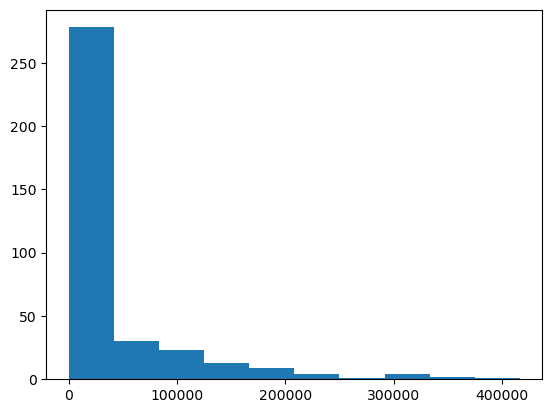

In [11]:
plt.hist(df['Square Footage'])

(array([1., 2., 2., 1., 5., 1., 5., 9., 4., 8.]),
 array([1955. , 1961.7, 1968.4, 1975.1, 1981.8, 1988.5, 1995.2, 2001.9,
        2008.6, 2015.3, 2022. ]),
 <BarContainer object of 10 artists>)

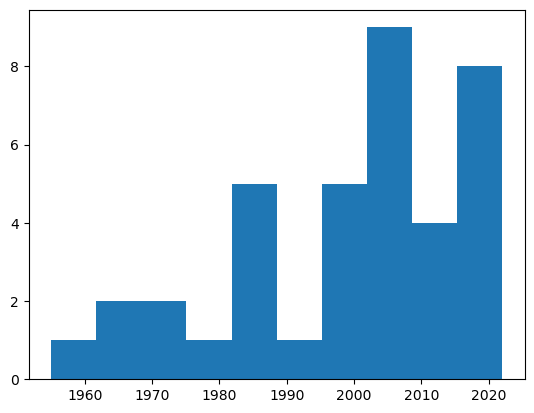

In [12]:
plt.hist(df['Year Acquired'])

(array([1., 2., 2., 1., 5., 1., 5., 9., 4., 8.]),
 array([1955. , 1961.7, 1968.4, 1975.1, 1981.8, 1988.5, 1995.2, 2001.9,
        2008.6, 2015.3, 2022. ]),
 <BarContainer object of 10 artists>)

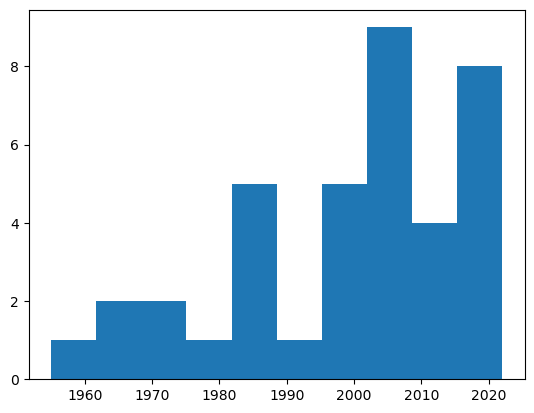

In [13]:
plt.hist(df['Year Acquired'])

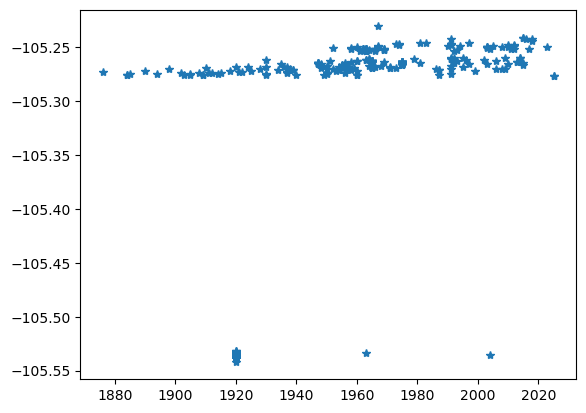

In [14]:
plt.plot(df['Year Built'], df['Longitude'], linestyle='', marker='*')

<Axes: ylabel='Building Use'>

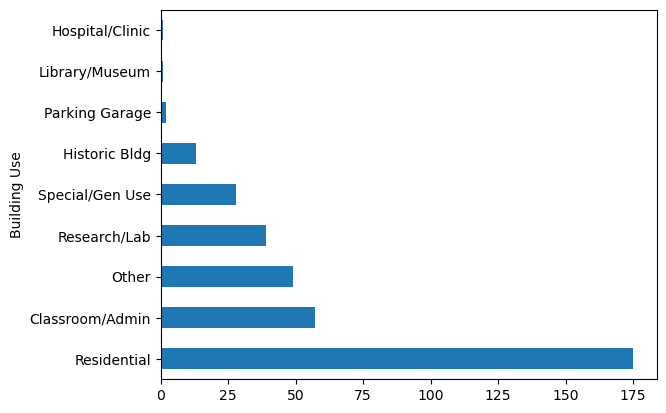

In [15]:
df['Building Use'].value_counts().plot(kind='barh')

# ML Train

In [16]:
df_new = df.drop('Building Name', axis=1).drop('Building Use', axis=1).drop('Zone', axis=1)

X = df_new.drop('use_num', axis=1).drop('zone_num', axis=1)
y1 = df_new['use_num']
y2 = df_new['zone_num']
X1_train, X1_test, y1_train, y1_test = sklearn.model_selection.train_test_split(X, y1, test_size=0.2)
X2_train, X2_test, y2_train, y2_test = sklearn.model_selection.train_test_split(X, y2, test_size=0.2)

In [17]:
clf1 = sklearn.ensemble.RandomForestClassifier(n_estimators=200)
clf1.fit(X1_train, y1_train)
y1_pred = clf1.predict(X1_test)

clf2 = sklearn.ensemble.RandomForestClassifier(n_estimators=200) 
clf2.fit(X2_train, y2_train)
y2_pred = clf2.predict(X2_test)

In [18]:
sklearn.metrics.accuracy_score(y1_test, y1_pred)

0.684931506849315

In [19]:
sklearn.metrics.accuracy_score(y2_test, y2_pred)

0.9863013698630136

In [20]:
sklearn.metrics.confusion_matrix(y1_test, y1_pred)

array([[ 8,  1,  4,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0],
       [ 3,  1, 31,  2,  0,  0],
       [ 1,  0,  2,  7,  0,  1],
       [ 2,  0,  1,  1,  3,  1],
       [ 0,  0,  1,  1,  0,  0]])

In [21]:
sklearn.metrics.confusion_matrix(y2_test, y2_pred)

array([[ 1,  0,  0,  0,  0,  0,  0],
       [ 1, 17,  0,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0,  0],
       [ 0,  0,  0, 13,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0, 22]])

<BarContainer object of 5 artists>

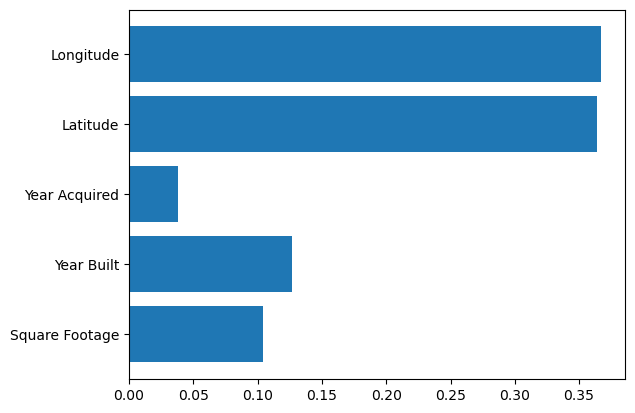

In [22]:
plt.barh(clf2.feature_names_in_, clf2.feature_importances_)

<BarContainer object of 5 artists>

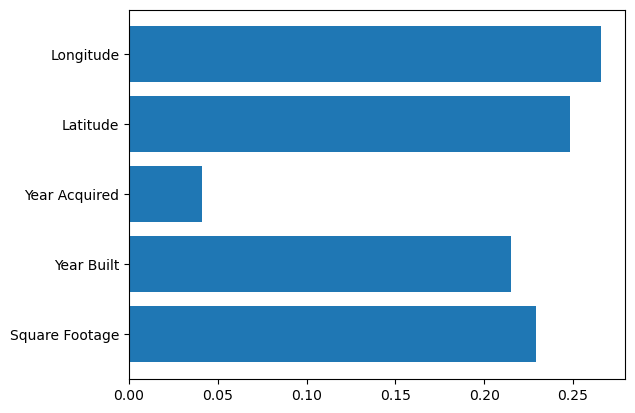

In [23]:
plt.barh(clf1.feature_names_in_, clf1.feature_importances_)

# Some Visuals

In [26]:
geometry = [Point((p)) for p in zip(df['Latitude'] , df['Longitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

gdf.explore()